In [11]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 
from  sklearn.linear_model import LinearRegression
#
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

# model save
import pickle

# 
import json

import warnings
warnings.filterwarnings("ignore")

#### 1) Problem Statment

In [ ]:
Predict medical insurance price /Premium base on independent variables

#### 2) Data Gathering

In [4]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3) EDA / Data quality Check

In [5]:
# Missing
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isna().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
df.describe() # return only numerical stats

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.corr()

C:\Users\Admin\AppData\Local\Temp/ipykernel_5908/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### vif

In [ ]:
- Only numerical variables

In [14]:
df1 = df.drop(["charges","sex","smoker","region"],axis=1)
vif = pd.DataFrame()
vif["Feature"] = df1.columns
vif["vif_factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

,Feature,vif_factor
0,age,7.536550
1,bmi,7.846515
2,children,1.796637


#### Feature wise

In [15]:
df["age"].unique(),df["age"].nunique()

(array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
        59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
        20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64),
 47)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

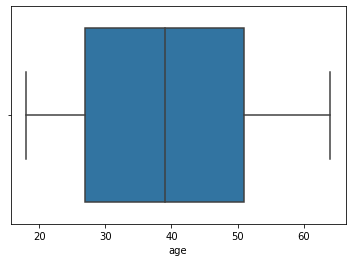

In [16]:
sns.boxplot(df["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

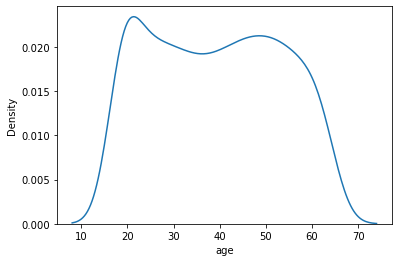

In [18]:
sns.kdeplot(df["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

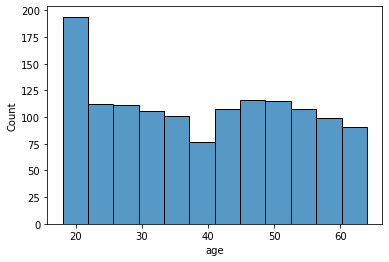

In [19]:
sns.histplot(df["age"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

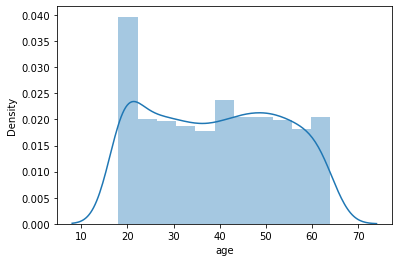

In [20]:
sns.distplot(df["age"])

In [21]:
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [23]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [24]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### 4. Feature Engineering

In [ ]:
# Treatment of Missing 
# .fillna()

In [ ]:
# rename

In [25]:
df.rename(columns = {"sex":"gender"},inplace=True)

In [26]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
df["gender"].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [28]:
## replace
# gender and smoker
df["gender"].replace({"male":0,"female":1},inplace =True)

In [29]:
df["gender"].value_counts()

0    676
1    662
Name: gender, dtype: int64

In [30]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [31]:
## replace
# gender and smoker
df["smoker"].replace({"no":0,"yes":1},inplace =True)

In [32]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [33]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


#### encoding

In [34]:
df = pd.get_dummies(df,columns = ["region"])
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


#### 5. Feature Selection

In [ ]:
df.corr()
df.vif()

#### 6. Model Training

#### Data spliting

In [47]:
x = df.drop("charges",axis=1)
y = df["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=40)

In [48]:
x.shape,x_train.shape

((1338, 9), (1070, 9))

- Model training

In [49]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

##### 7 Evaluation

#### Testing

In [50]:
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)

r2 = r2_score(y_test,y_pred)
print("R2 Score",r2)

adj_r2 =  1 - (((1-r2)*(x_test.shape[0] - 1))/(x_test.shape[0] - x_test.shape[1]-1))
print("Adjusted r2 score",adj_r2)

MSE
 39737837.06024521
MAE
 4358.280567455449
RMSE
 6303.7954487947345
R2 Score 0.7341854344194202
Adjusted r2 score 0.7249128332945163


#### Training

In [51]:
y_pred = lr_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred)
print("MSE\n",mse)

mae = mean_absolute_error(y_train,y_pred)
print("MAE\n",mae)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)

r2 = r2_score(y_train,y_pred)
print("R2 Score",r2)

adj_r2 =  1 - (((1-r2)*(x_test.shape[0] - 1))/(x_test.shape[0] - x_test.shape[1]-1))
print("Adjusted r2 score",adj_r2)

MSE
 35738908.17587644
MAE
 4103.694591054442
RMSE
 5978.202754664351
R2 Score 0.7548625668706685
Adjusted r2 score 0.7463112610638314


#### 8.Deployment

#### User Input

In [ ]:
age                  = 18.0000
gender               =   "male" # 
bmi                  =  33.7700
children             =  1.0000
smoker               =  "no"
region               = northeast
charges              = ?

In [53]:
region               = "northwest"
"region_" + region

'region_northwest'

In [67]:
project_data = {"gender":{"male":0,"female":1},
                "smoker": {"yes":1,"no":0},
                "columns" : list(x.columns)}
project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [80]:
age                  = 18.0000
gender               =   "male" # 
bmi                  =  33.7700
children             =  1.0000
smoker               =  "no"
region               = "northwest"
# charges              = ?

In [81]:
columns_names = x.columns
columns_names

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [82]:
columns_names = x.columns
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = project_data["gender"]["male"]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data["smoker"]["no"]
region1 = "region_" + region
region1_index = np.where(columns_names == region1)[0][0]
region1_index
test_array[region1_index] = 1
test_array

array([18.  ,  0.  , 33.77,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ])

In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
## lrmodel
predicted_insrance_price = np.around(lr_model.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 3928.91


In [ ]:
## model stored

In [89]:
with open("Linear_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [ ]:
# json

In [90]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)